In [1]:
import os
import imageio
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import qutip
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter, LinearLocator
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
import scipy

In [2]:
# Pauli matrices
sx = qutip.sigmax()
sy = qutip.sigmay()
sz = qutip.sigmaz()

In [3]:
def animate_bloch(states, eig_states, name, duration=0.1, save_all=False):

    b = qutip.Bloch()
    b.vector_color = ["r"]
    # b.view = [-40,30]
    images = []

    try:
        length = len(states)
    except:
        length = 1
        states = [states]
    ## normalize colors to the length of data ##
    # nrm = mpl.colors.Normalize(0,length)
    # colors = cm.cool(nrm(range(length))) # options: cool, summer, winter, autumn etc.

    ## customize sphere properties ##
    # b.point_color = [colors[0]] # options: 'r', 'g', 'b' etc.
    b.point_marker = ["o"]
    b.point_size = [25]

    for i in range(length):
        b.clear()
        b.add_states(eig_states)
        b.add_states(states[i])
        b.add_states(states[: (i + 1)], "point")
        if save_all:
            b.save(dirc="sphere")  # saving images to tmp directory
            filename = "sphere/bloch_%01d.png" % i
        else:
            filename = "temp_file.png"
            b.save(filename)
        images.append(imageio.v2.imread(filename))
    imageio.mimsave(f"{name}.gif", images, duration=duration)

In [4]:
def bloch_vector_to_statevector(bloch_vector):
    # Unpack the Bloch vector
    x, y, z = bloch_vector
    
    # Calculate the norm of the Bloch vector
    r = np.sqrt(x**2 + y**2 + z**2)
    
    # Normalize the vector (if r is zero, return the ground state |0⟩)
    if r == 0:
        return qutip.basis(2, 0)  # The |0⟩ state
    
    # Normalize the Bloch vector
    x_norm = x / r
    y_norm = y / r
    z_norm = z / r

    # Calculate theta and phi
    theta = np.arccos(z_norm)  # Angle from z-axis
    phi = np.arctan2(y_norm, x_norm)  # Angle in x-y plane

    # Convert to the quantum state |ψ⟩
    statevector = (np.cos(theta / 2) * qutip.basis(2, 0) + 
                   np.exp(1j * phi) * np.sin(theta / 2) * qutip.basis(2, 1))
    
    return statevector

### Exercise 19

Consider a qubit with a Hamiltonian $H = 0$ prepared in state $\lvert 0 \rangle$. Let's say an experimentalist can turn on and off the fields $\omega_X, \omega_Y, \omega_Z$ in the Hamiltonian (7) abruptly at any time. So, say at time $t = 0$ we abruptly turn on the $Y$-field, which means the Hamiltonian becomes $H/\hbar = -\omega_Y / 2$. The qubit at this moment is still in state $\lvert 0 \rangle$, which is no longer an eigenstate of the new Hamiltonian. So some time-evolution will take place. Show this evolution on the Bloch sphere. At what time should the experimentalist set $\omega = 0$ to arrive at states $\lvert 1 \rangle, \lvert + \rangle, \lvert - \rangle$?


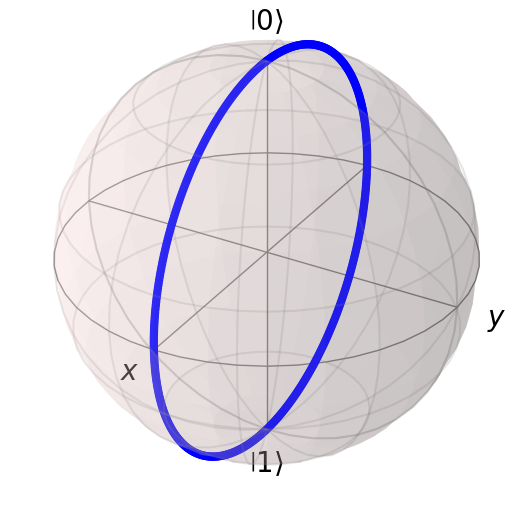

In [9]:
initial_state = qutip. basis(2, 0) # |0⟩

# Define the Hamiltonian H/ℏ = -ω_Y/2 * Y
omega_Y = 2 * np.pi  # Set omega_Y to 2π for simplicity
H = -0.5 * omega_Y * sy

# Time array for evolution
tlist = np.linspace(0, 1, 500)  # Time from 0 to 1 seconds

# Solve for the time evolution using mesolve
result = qutip.mesolve(H, initial_state, tlist, [], [sx, sy, sz])

# Extract the expectation values of Pauli matrices for Bloch sphere
x = result.expect[0]
y = result.expect[1]
z = result.expect[2]

# Plot the Bloch vector trajectory
b = qutip.Bloch()
b.add_points([x, y, z])
b.show()

Time to reach |1⟩: 0.4990 seconds. With formula: 0.5 seconds.
Time to reach |+⟩: 0.7495 seconds. With formula: 0.75 seconds.
Time to reach |−⟩: 0.2505 seconds. With formula: 0.25 seconds.


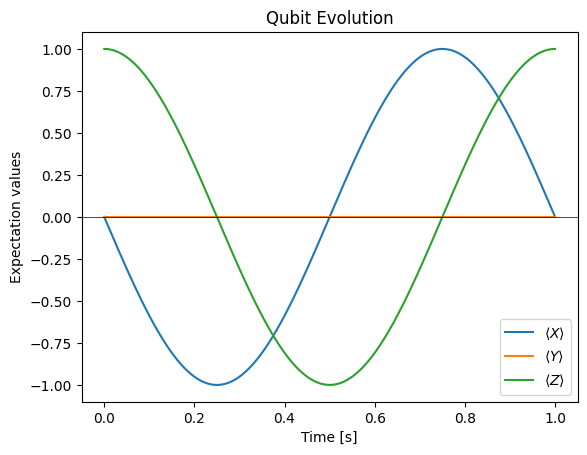

In [10]:
# Finding the times when the state reaches |1⟩, |+⟩, and |−⟩
# |1⟩: Z-axis points to -1
t_1 = tlist[np.argmin(z)]  # When z is closest to -1 (|1⟩)

# |+⟩: X-axis points to +1
t_plus = tlist[np.argmax(x)]  # When x is closest to +1 (|+⟩)

# |−⟩: X-axis points to -1
t_minus = tlist[np.argmin(x)]  # When x is closest to -1 (|−⟩)

# Print the results
print(f"Time to reach |1⟩: {t_1:.4f} seconds. With formula: {np.pi / omega_Y } seconds.")
print(f"Time to reach |+⟩: {t_plus:.4f} seconds. With formula: {(3 * np.pi) / (2 * omega_Y) } seconds.")
print(f"Time to reach |−⟩: {t_minus:.4f} seconds. With formula: { np.pi / (2 * omega_Y) } seconds.")

# Plot the expectation values of X, Y, Z over time
plt.figure()
plt.plot(tlist, x, label=r'$\langle X \rangle$')
plt.plot(tlist, y, label=r'$\langle Y \rangle$')
plt.plot(tlist, z, label=r'$\langle Z \rangle$')
plt.axhline(0, color='k', lw=0.5)
plt.xlabel('Time [s]')
plt.ylabel('Expectation values')
plt.legend()
plt.title("Qubit Evolution")
plt.show()

### Exercise 20
Let's do the same exercise as before, but with the following change: at time $t = 0$ we abruptly turn on the $X$-field, which means the Hamiltonian becomes $H/\hbar = -\omega_X / 2$. Show this evolution on the Bloch sphere. At what time should the experimentalist set $\omega = 0$ to obtain states $\lvert 1 \rangle, \lvert +i \rangle, \lvert -i \rangle$?


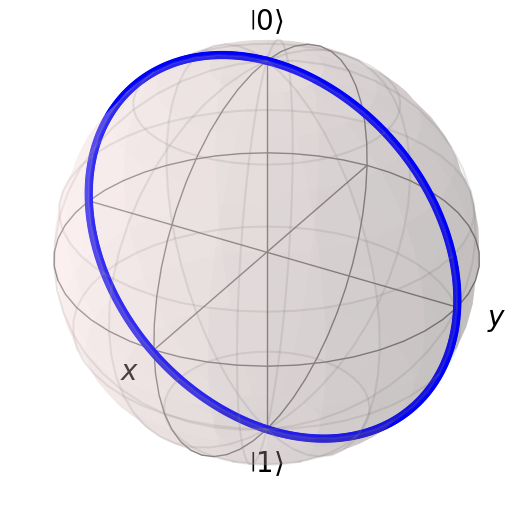

In [11]:
initial_state = qutip. basis(2, 0) # |0⟩

# Define the Hamiltonian H/ℏ = -ω_X/2 * X
omega_X = 2 * np.pi  # Set omega_X to 2π for simplicity
H = -0.5 * omega_X * sx

# Time array for evolution
tlist = np.linspace(0, 1, 500)  # Time from 0 to 1 seconds

# Solve for the time evolution using mesolve
result = qutip.mesolve(H, initial_state, tlist, [], [sx, sy, sz])

# Extract the expectation values of Pauli matrices for Bloch sphere
x = result.expect[0]
y = result.expect[1]
z = result.expect[2]

# Plot the Bloch vector trajectory
b = qutip.Bloch()
b.add_points([x, y, z])
b.show()

Time to reach |1⟩: 0.4990 seconds. With formula: 0.5 seconds.
Time to reach |+i⟩: 0.2505 seconds. With formula: 0.25 seconds.
Time to reach |−i⟩: 0.7495 seconds. With formula: 0.75 seconds.


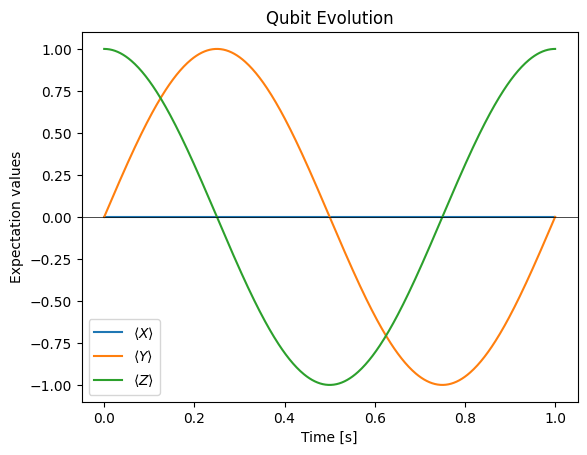

In [12]:
# Finding the times when the state reaches |1⟩, |+i⟩, and |-i⟩
t_1 = tlist[np.argmin(z)]  # When z is closest to -1 (|1⟩)
t_plus = tlist[np.argmax(y)]  # When y is closest to +1 (|+i⟩)
t_minus = tlist[np.argmin(y)]  # When y is closest to -1 (|-i⟩)

# Print the results
print(f"Time to reach |1⟩: {t_1:.4f} seconds. With formula: {np.pi / omega_X } seconds.")
print(f"Time to reach |+i⟩: {t_plus:.4f} seconds. With formula: {np.pi / (2 * omega_X) } seconds.")
print(f"Time to reach |−i⟩: {t_minus:.4f} seconds. With formula: { (3 * np.pi) / (2 * omega_X) } seconds.")

# Plot the expectation values of X, Y, Z over time
plt.figure()
plt.plot(tlist, x, label=r'$\langle X \rangle$')
plt.plot(tlist, y, label=r'$\langle Y \rangle$')
plt.plot(tlist, z, label=r'$\langle Z \rangle$')
plt.axhline(0, color='k', lw=0.5)
plt.xlabel('Time [s]')
plt.ylabel('Expectation values')
plt.legend()
plt.title("Qubit Evolution")
plt.show()

### Exercise 21
Let's do a slightly fancier manipulation. We take a Hamiltonian $H/\hbar = -\omega_Z / 2$ and start again in state $\lvert 0 \rangle$. At time $t = 0$ we turn on an $X$-field, which makes the new Hamiltonian $H/\hbar = -\omega_Z / 2 - \omega_X / 2$ (same strength field along both axis). Solve for the evolution of the state for $t > 0$ and show it on the Bloch sphere. At what time does $\lvert 0 \rangle$ turn into $\lvert + \rangle$?


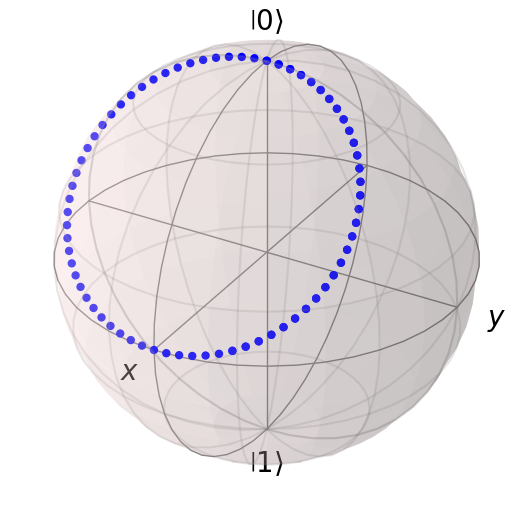

In [13]:
# Define parameters
omega = 2 * np.pi  # Set omega to a specific value
H = -0.5 * omega * (sx + sz)  # Hamiltonian

# Define the initial state |0⟩
initial_state = qutip.basis(2, 0)

# Define the time points
tlist = np.linspace(0, 1, 100)  # Simulate from 0 to 1 seconds

# Solve the time evolution
result = qutip.mesolve(H, initial_state, tlist, [], [sx, sy, sz])

# Extract the expectation values
x = result.expect[0]
y = result.expect[1]
z = result.expect[2]

# Plot the Bloch vector trajectory
b = qutip.Bloch()
b.add_points([x, y, z])
b.show()

Time to reach |+⟩: 0.3535 seconds, With formula: 0.3536 seconds.


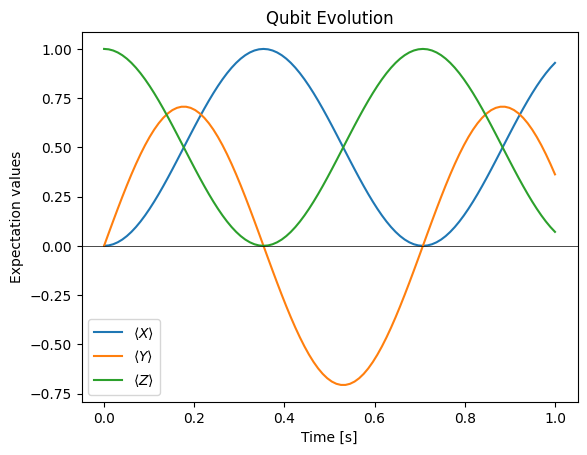

In [14]:
# Finding the time when the state reaches |+⟩
t_plus = tlist[np.argmax(x)]  # When x is closest to +1 (|+⟩)

# Print the results
print(f"Time to reach |+⟩: {t_plus:.4f} seconds, With formula: {np.sqrt(2) * np.pi / ( 2 * omega):.4f} seconds.")

# Plot the expectation values of X, Y, Z over time
plt.figure()
plt.plot(tlist, x, label=r'$\langle X \rangle$')
plt.plot(tlist, y, label=r'$\langle Y \rangle$')
plt.plot(tlist, z, label=r'$\langle Z \rangle$')
plt.axhline(0, color='k', lw=0.5)
plt.xlabel('Time [s]')
plt.ylabel('Expectation values')
plt.legend()
plt.title("Qubit Evolution")
plt.show()

Verify the exponentiation of matrix `M` with the calculation done by hand.

In [15]:
M = - omega * (sx + sz) / 2

c = np.cos(np.pi / 8)
s = np.sin(np.pi / 8)

m1 = np.array([[c**2, s * c], [c * s, s**2]])
m2 = np.array([[s**2, -s * c], [-s * c, c**2]])

for t in tlist:
    rotate_M = (-1j * M * t).expm()
    U = np.exp(1j * omega * t / np.sqrt(2)) * m1 + np.exp(-1j * omega * t / np.sqrt(2)) * m2
    assert np.allclose(rotate_M.full(), U) == True    

### Exercise 22
In the previous exercise, repeat the calculation but start from state $\lvert + \rangle$ at $t = 0$. At what time does $\lvert + \rangle$ turn into $\lvert 0 \rangle$?


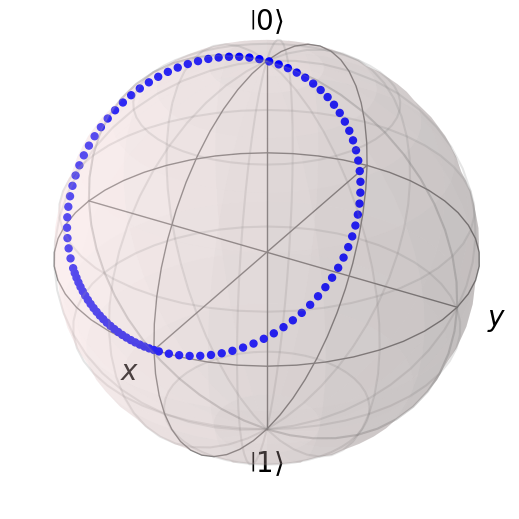

In [16]:
# Define parameters
omega = 2 * np.pi  # Set omega to a specific value
H = -0.5 * omega * (sx + sz)  # Hamiltonian

# Define the initial state |+⟩
initial_state = (qutip.basis(2, 0) + qutip.basis(2, 1)) / np.sqrt(2)

# Define the time points
tlist = np.linspace(0, 0.8, 100)  # Simulate from 0 to 1 seconds

# Solve the time evolution
result = qutip.mesolve(H, initial_state, tlist, [], [sx, sy, sz])

# Extract the expectation values
x = result.expect[0]
y = result.expect[1]
z = result.expect[2]

# Plot the Bloch vector trajectory
b = qutip.Bloch()
b.add_points([x, y, z])
b.show()

Time to reach |0⟩: 0.3556 seconds, With formula: 0.3536 seconds.


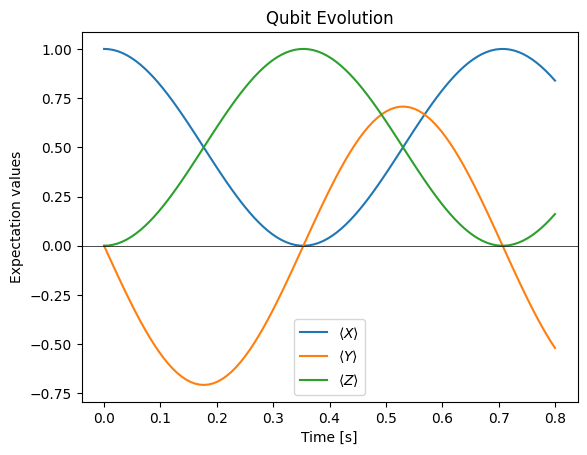

In [17]:
# Finding the time when the state reaches |0⟩
t_0 = tlist[np.argmax(z)]  # When z is closest to +1 (|0⟩)

# Print the results
print(f"Time to reach |0⟩: {t_0:.4f} seconds, With formula: {np.pi / (np.sqrt(2) * omega):.4f} seconds.")

# Plot the expectation values of X, Y, Z over time
plt.figure()
plt.plot(tlist, x, label=r'$\langle X \rangle$')
plt.plot(tlist, y, label=r'$\langle Y \rangle$')
plt.plot(tlist, z, label=r'$\langle Z \rangle$')
plt.axhline(0, color='k', lw=0.5)
plt.xlabel('Time [s]')
plt.ylabel('Expectation values')
plt.legend()
plt.title("Qubit Evolution")
plt.show()

### Exercise 23 
Consider the evolution of the qubit starting from state $\lvert 0 \rangle$ during the time $\tau_1$ when $\omega_X = g$. Show that the evolution is a rotation of the qubit state vector in the Bloch sphere, around the axis defined by components $(g, 0, \omega_Z)$, and with a constant angular velocity $\sqrt{\omega_Z^2 + g^2}$. What's the period of such rotation?


w_z: 6.28, w_x: 3.14


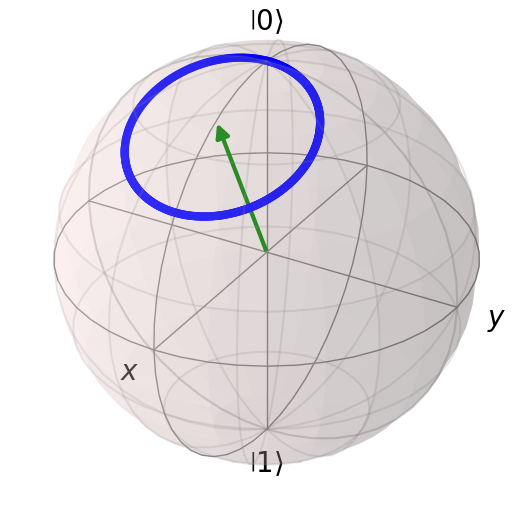

In [5]:
# Define parameters
omega_Z = 2 * np.pi  # Z-axis field strength (you can change this)
g = 0.5 * omega_Z  # X-axis field strength (g ≪ ωZ)
H = -0.5 * (omega_Z * sz + g * sx)  # Hamiltonian: H = -ωZ/2 * Z - g/2 * X

print(f"w_z: {omega_Z:.2f}, w_x: {g:.2f}")

# Define the initial state |0⟩
initial_state = qutip.basis(2, 0)

# Define the time points
tlist = np.linspace(0, 1.5, 500)  # Simulate from 0 to 1.5 seconds

# Solve the time evolution
result = qutip.mesolve(H, initial_state, tlist, [], [sx, sy, sz])

vec = np.array([g, 0, omega_Z])
vec /= np.linalg.norm(vec)

# Extract the expectation values
x = result.expect[0]
y = result.expect[1]
z = result.expect[2]

# Plot the Bloch vector trajectory
b = qutip.Bloch()
b.add_vectors(vec)
b.add_points([x, y, z])
b.show()

We can check that all the vectors have same angle with the vector $(g, 0, \omega_z)$

In [19]:
axis_vec = vec
axis_vec /= np.linalg.norm(axis_vec)

trajectory = np.vstack([x, y, z]).T

vec = trajectory[0]
angle = np.arccos(np.dot(axis_vec, vec))

print('angle:', angle)

for vec in trajectory[1:]:
    assert np.allclose(np.arccos(np.dot(axis_vec, vec)), angle) == True

angle: 0.4636476090008059


Also we can plot the eignestates of $H$ and see the axis of rotation formed by the eigenvectors of $H$.

In [9]:
eigvals, eigstates = H.eigenstates()
print("Eigenvalues:",eigvals)
print("Eigenstates:",eigstates)

Eigenvalues: [-3.51240737  3.51240737]
Eigenstates: [Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-0.97324899]
  [-0.22975292]]
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[-0.22975292]
  [ 0.97324899]]                                                       ]


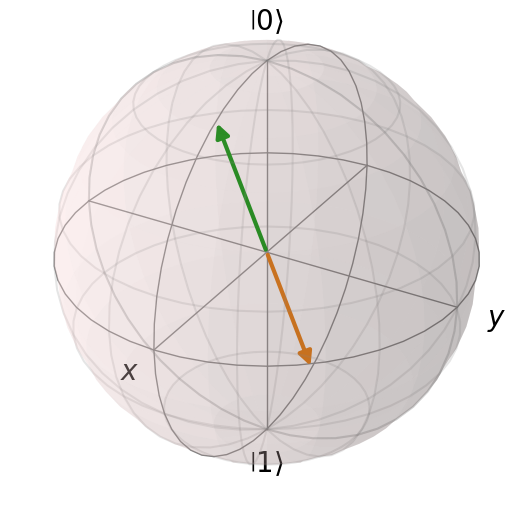

In [10]:
b = qutip.Bloch()
b.make_sphere()
b.add_states(eigstates)
b.render()
b.show()

Angular velocity of rotation: 7.0248 radians/second
Period of rotation: 0.8944 seconds


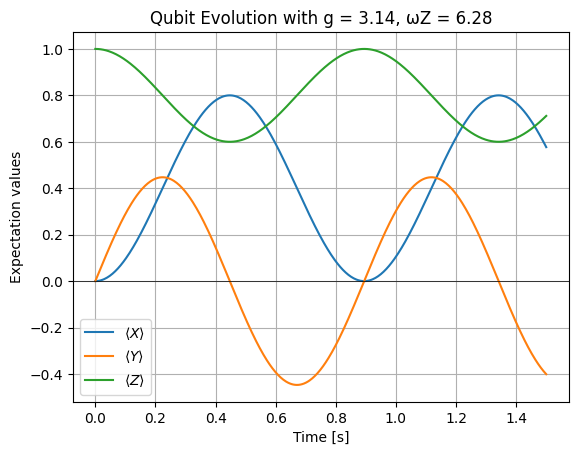

In [20]:
# Compute the angular velocity and period of rotation
angular_velocity = np.sqrt(omega_Z**2 + g**2)
period_of_rotation = 2 * np.pi / angular_velocity

# Print the angular velocity and period
print(f"Angular velocity of rotation: {angular_velocity:.4f} radians/second")
print(f"Period of rotation: {period_of_rotation:.4f} seconds")

# Plot the expectation values of X, Y, Z over time
plt.figure()
plt.plot(tlist, x, label=r'$\langle X \rangle$')
plt.plot(tlist, y, label=r'$\langle Y \rangle$')
plt.plot(tlist, z, label=r'$\langle Z \rangle$')
plt.axhline(0, color='k', lw=0.5)
plt.xlabel('Time [s]')
plt.ylabel('Expectation values')
plt.legend()
plt.title(f"Qubit Evolution with g = {g:.2f}, ωZ = {omega_Z:.2f}")
plt.grid()
plt.show()

Visualize for different values of $g$

In [21]:
from time import time

fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(projection='3d'))
ax.axis('square') # to get a nice circular plot

## bloch sphere definition
b = qutip.Bloch(fig=fig, axes=ax)
b.vector_color = ["r"]
b.point_marker = ["o"]
b.point_color = ["b"] * 4
b.point_size = [25]
b.render() # render to the correct subplot 
images = []

start = time()
flist = np.linspace(0, 1.0, 10)
for index, factor in enumerate(flist):    
    # Define parameters
    omega_Z = 2 * np.pi  # Z-axis field strength (you can change this)
    g = factor * omega_Z  # X-axis field strength (g ≪ ωZ)
    H = -0.5 * (omega_Z * sz + g * sx)  # Hamiltonian: H = -ωZ/2 * Z - g/2 * X
    
    print(f"w_z: {omega_Z:.2f}, w_x: {g:.2f}")
    
    # Define the initial state |0⟩
    initial_state = qutip.basis(2, 0)
    
    # Define the time points
    angular_velocity = np.sqrt(omega_Z**2 + g**2)
    period_of_rotation = 2 * np.pi / angular_velocity
    tlist = np.linspace(0, period_of_rotation, 10 * (index + 1) // 2)  # Simulate from 0 to 1 seconds
    
    # Solve the time evolution
    result = qutip.mesolve(H, initial_state, tlist, [], [sx, sy, sz])
    
    vec = np.array([g, 0, omega_Z])
    vec /= np.linalg.norm(vec)
    
    # Extract the expectation values
    x = result.expect[0]
    y = result.expect[1]
    z = result.expect[2]

    trajectory = np.vstack([x, y, z]).T
    states = [bloch_vector_to_statevector([i[0], i[1], i[2]]) for i in trajectory]
    axis_state = bloch_vector_to_statevector(vec)
    name = "ex_23"
    duration = 0.1
    save_all = False

    length = len(states)
    for i in range(length):
        b.clear()
        b.add_states([axis_state])
        # b.add_states(states[i])
        b.add_states(states[: (i + 1)], "point", colors=['b'] * len(states[: (i+1)]))
        b.add_annotation(axis_state, f"g = {factor:.2f}$\omega_z$", ha='center', position=(0.4, 0.9))  
        # ax.annotate(f"g = {factor:.2f} w_z", xy=(0.01, 0.9), xytext=(0.1, 0.8), xycoords='axes fraction', fontsize=15, color='r', ha='center')  
        if save_all:
            b.save(dirc="sphere")  # saving images to tmp directory
            filename = "sphere/bloch_%01d.png" % i
        else:
            filename = "temp_file.png"
            b.save(filename)
        images.append(imageio.v2.imread(filename))    

imageio.mimsave(f"{name}.gif", images, duration=duration)
end = time()
print("Done")
print(f"Duration: {end-start}")

w_z: 6.28, w_x: 0.00
w_z: 6.28, w_x: 0.70
w_z: 6.28, w_x: 1.40
w_z: 6.28, w_x: 2.09
w_z: 6.28, w_x: 2.79
w_z: 6.28, w_x: 3.49
w_z: 6.28, w_x: 4.19
w_z: 6.28, w_x: 4.89
w_z: 6.28, w_x: 5.59
w_z: 6.28, w_x: 6.28
Done
Duration: 38.608112812042236


The animated bloch sphere is shown below. The solution is a rotation of the initial $| 0 \rangle$-vector around the vector oriented along $(g, 0, \omega_z)$.

<div align="center">
<img width="400" src="ex_23.gif" /><br>
</div>

Angular Velocity:
$$
\Omega = \sqrt{\omega_Z^2 + g^2}
$$
Period of Rotation:

$$
T = \frac{2\pi}{\sqrt{\omega_Z^2 + g^2}}
$$

### Exercise 24
Now suppose we set $\tau_1 = \pi / \sqrt{\omega_Z^2 + g^2}$ and $\tau_2 = \pi / \omega_Z$, and say $g = \omega_Z / 10$. Show geometrically the evolution of the qubit states after each time $\tau_1$ and $\tau_2$ in the sequence. This you can actually do by hand but try QuTiP as well. Approximately what time would it take for the state vector to cross the equatorial plane?


In [22]:
# Parameters
omega_Z = 2 * np.pi  # Z-axis field strength (can adjust this value)
g = omega_Z / 10  # X-axis field strength is smaller (g = ωZ / 10)

# Define the two Hamiltonians
H1 = -0.5 * (omega_Z * sz + g * sx)  # Hamiltonian for τ1 (Z and X fields on)
H2 = -0.5 * omega_Z * sz  # Hamiltonian for τ2 (only Z field on)

# Define the time intervals
tau1 = np.pi / np.sqrt(omega_Z**2 + g**2)  # Time τ1
tau2 = np.pi / omega_Z  # Time τ2

# Define the initial state |0⟩
initial_state = qutip.basis(2, 0)

options = qutip.solver.Options(store_states=True)

tlist1 = np.linspace(0, tau1, 100)
tlist2 = np.linspace(0, tau2, 100)

results = []
steps = 10 # Number of iterations of τ1 and τ2

for i in range(steps):
    if i > 0:
        initial_state = results[-1].states[-1] # Make the last step state as initial state

    # Time evolution for τ1 (H1)
    result1 = qutip.mesolve(H1, initial_state, tlist1, [], [sx, sy, sz], options=options)

    # Time evolution for τ2 (H2) starting from the final state of τ1
    result2 = qutip.mesolve(H2, result1.states[-1], tlist2, [], [sx, sy, sz], options=options)

    results += [result1, result2]

/home/gopald/Documents/jetix/lib/python3.10/site-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


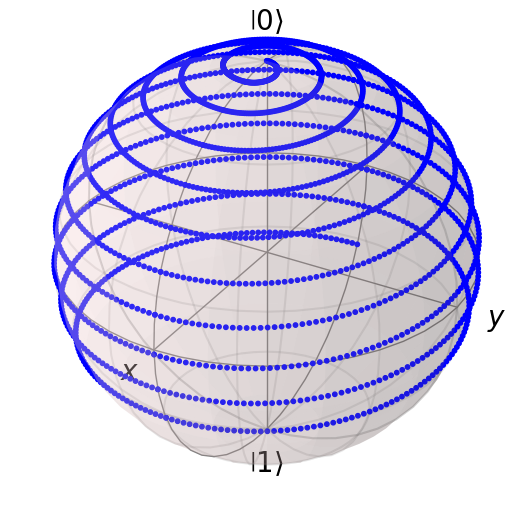

In [23]:
x_total, y_total, z_total = [], [], []

for i in range(len(results)):
    # Extract the expectation values
    x = results[i].expect[0]
    y = results[i].expect[1]
    z = results[i].expect[2]

    x_total += list(x)
    y_total += list(y)
    z_total += list(z)

# Plot the Bloch vector trajectory
b = qutip.Bloch()
b.point_size = [10]
b.add_points([x_total, y_total, z_total], colors=['b'] * len(x_total))
b.show()

In [24]:
total_time = (tau1 + tau2) * steps
total_tlist = np.linspace(0, total_time, 100 * steps * 2)

Time to cross the equatorial plane: 7.3704 seconds


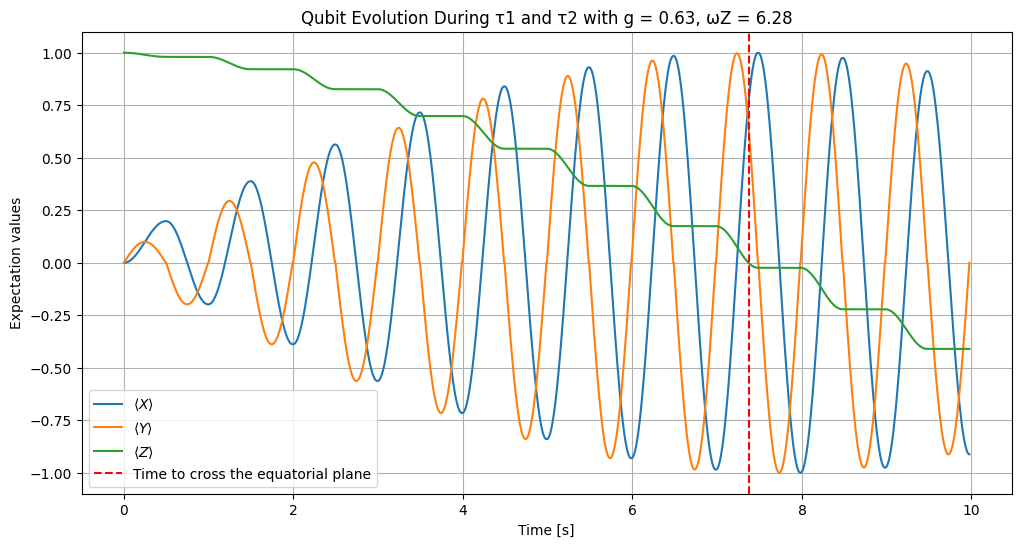

In [25]:
# Plot expectation values over time
plt.figure(figsize=(12, 6))
plt.plot(total_tlist, x_total, label=r'$\langle X \rangle$')
plt.plot(total_tlist, y_total, label=r'$\langle Y \rangle$')
plt.plot(total_tlist, z_total, label=r'$\langle Z \rangle$')
plt.xlabel('Time [s]')
plt.ylabel('Expectation values')
plt.title(f"Qubit Evolution During τ1 and τ2 with g = {g:.2f}, ωZ = {omega_Z:.2f}")


# Time to cross the equatorial plane (when z crosses zero)
crossing_index = np.argmin(np.abs(z_total))
time_to_cross_equator = total_tlist[crossing_index]
print(f"Time to cross the equatorial plane: {time_to_cross_equator:.4f} seconds")

plt.axvline(time_to_cross_equator, ls='--', color='r', label="Time to cross the equatorial plane")
plt.legend()
plt.grid()
plt.show()

### Exercise 25
Time for a true QuTiP experiment. Let us set the sequence such that during the time $\tau$ we get $\omega_X = g$ and during the next interval $\tau$ we get $\omega_X = -g$. A ”square wave” signal for $\omega_X$. Let’s further assume that $g = \omega_Z / 1000 $ and $\tau = \pi / \omega_Z$. Simulate the evolution of the qubit state. Plot $\langle Z \rangle$, $\langle X \rangle$, $\langle Y \rangle$ as a function of time.


In [26]:
# Parameters
omega_Z = 2 * np.pi  # Z-axis field strength (can adjust this value)
g = omega_Z / 1000 # X-axis field strength is smaller (g = ωZ / 1000)

# Define the two Hamiltonians
H1 = -0.5 * (omega_Z * sz + g * sx)  # Hamiltonian for τ (ω_X = g)
H2 = -0.5 * (omega_Z * sz - g * sx)  # Hamiltonian for τ (ω_X = -g)
tau = np.pi / omega_Z  # Time interval τ

# Define the initial state |0⟩
initial_state = qutip.basis(2, 0)

options = qutip.solver.Options(store_states=True)

tlist = np.linspace(0, tau, 100)

results = []
steps = 800 # Number of iterations of τ for ω_X = g and ω_X = -g

for i in range(steps):
    if i > 0:
        initial_state = results[-1].states[-1] # Make the last step state as initial state

    # Time evolution for τ (H2: ω_X = g)
    result1 = qutip.mesolve(H1, initial_state, tlist, [], [sx, sy, sz], options=options)

    # Time evolution for τ (H2: ω_X = -g) starting from the final state of previous evolution
    result2 = qutip.mesolve(H2, result1.states[-1], tlist, [], [sx, sy, sz], options=options)
    
    results += [result1, result2]

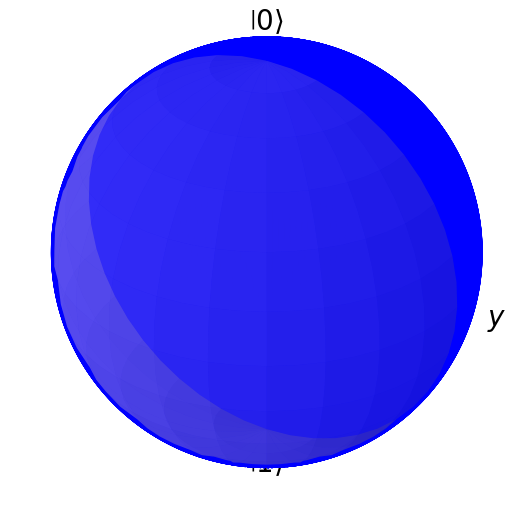

In [27]:
x_total, y_total, z_total = [], [], []

for i in range(len(results)):
    # Extract the expectation values
    x = results[i].expect[0]
    y = results[i].expect[1]
    z = results[i].expect[2]

    x_total += list(x)
    y_total += list(y)
    z_total += list(z)

# Plot the Bloch vector trajectory
b = qutip.Bloch()
b.point_size = [10]
b.add_points([x_total, y_total, z_total], colors=['b'] * len(x_total))
b.show()

In [28]:
total_time = tau * steps * 2
total_tlist = np.linspace(0, total_time, 100 * steps * 2)

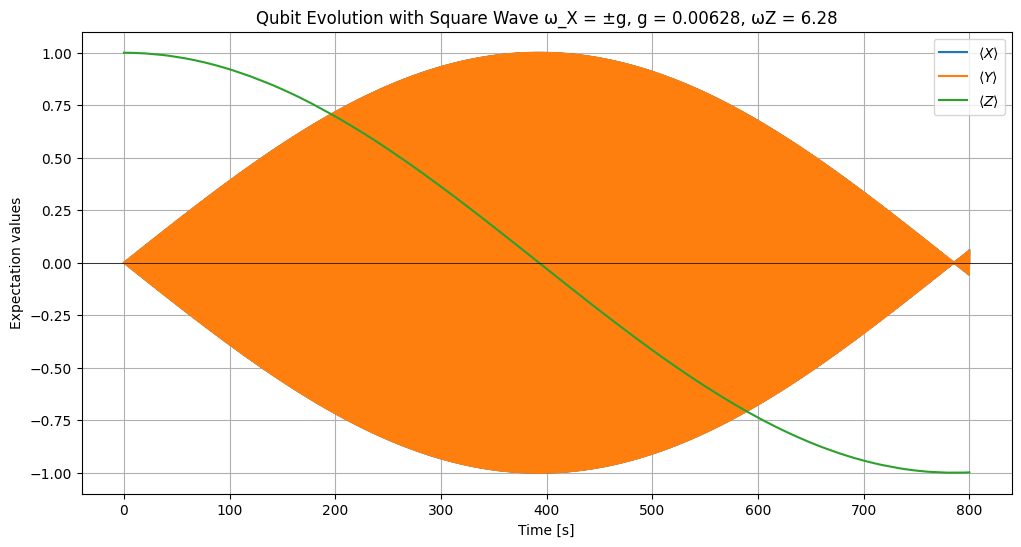

In [29]:
# Plot expectation values over time
plt.figure(figsize=(12, 6))
plt.plot(total_tlist, x_total, label=r'$\langle X \rangle$')
plt.plot(total_tlist, y_total, label=r'$\langle Y \rangle$')
plt.plot(total_tlist, z_total, label=r'$\langle Z \rangle$')
plt.axhline(0, color='k', lw=0.5)
plt.xlabel('Time [s]')
plt.ylabel('Expectation values')
plt.legend()
plt.title(f"Qubit Evolution with Square Wave ω_X = ±g, g = {g:.5f}, ωZ = {omega_Z:.2f}")
plt.grid()
plt.show()

Lets plot the expectation values over time for a small interval

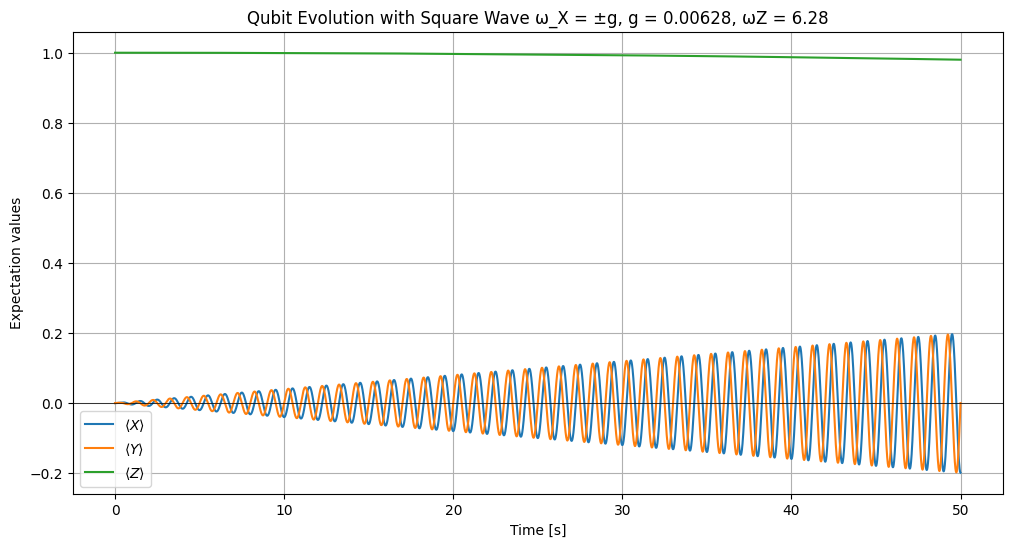

In [30]:
stop = 10000
plt.figure(figsize=(12, 6))
plt.plot(total_tlist[:stop], x_total[:stop], label=r'$\langle X \rangle$')
plt.plot(total_tlist[:stop], y_total[:stop], label=r'$\langle Y \rangle$')
plt.plot(total_tlist[:stop], z_total[:stop], label=r'$\langle Z \rangle$')
plt.axhline(0, color='k', lw=0.5)
plt.xlabel('Time [s]')
plt.ylabel('Expectation values')
plt.legend()
plt.title(f"Qubit Evolution with Square Wave ω_X = ±g, g = {g:.5f}, ωZ = {omega_Z:.2f}")
plt.grid()
plt.show()

### Exercise 26
At what time in the previous exercise the evolution comes back to state $\lvert 1 \rangle$ (for the first time). At what time the state becomes $\lvert + \rangle$? (for the first time).

In [31]:
# Finding the time when the state reaches |1⟩ (when Z = -1)
index_1 = np.argmin(np.abs(np.array(z_total) + 1))  # Find index when z is closest to -1
time_to_reach_1 = total_tlist[index_1]
print(f"Time to reach |1⟩: {time_to_reach_1:.4f} seconds")

# Finding the time when the state reaches |+⟩ (when X = 1 and Z = 0)
index_plus = np.argmin(np.abs(np.array(z_total)) + np.abs(np.array(x_total) - 1) + np.abs(np.array(y_total)))  # |+⟩: Z ~ 0, X ~ 1, Y ~ 0
time_to_reach_plus = total_tlist[index_plus]
print(f"Time to reach |+⟩: {time_to_reach_plus:.4f} seconds")

Time to reach |1⟩: 785.2799 seconds
Time to reach |+⟩: 392.4975 seconds


### Exercise 27 
If you succeeded with the previous exercises, try varying the time $\tau$ by around 0.1-1\%. How does the evolution change? Look at you, you’re becoming a real quantum engineer!

Varying $\tau$ by a small amount will slightly change the rotation angle during each interval. Since the system is rotating periodically, small changes in $\tau$ could accumulate over time, leading to phase shifts.

In [32]:
# Parameters
omega_Z = 2 * np.pi  # Z-axis field strength (can adjust this value)
g = omega_Z / 1000 # X-axis field strength is smaller (g = ωZ / 1000)

# Define the two Hamiltonians
H1 = -0.5 * (omega_Z * sz + g * sx)  # Hamiltonian for τ (ω_X = g)
H2 = -0.5 * (omega_Z * sz - g * sx)  # Hamiltonian for τ (ω_X = -g)
tau = np.pi / omega_Z  # Time interval τ

# Define percentage variation in τ (0.1% to 1%)
variation_percentage = 0.008  # e.g., 0.8% variation
tau_variation = tau * (1 + variation_percentage)  # Apply variation to τ

# Define the initial state |0⟩
initial_state = qutip.basis(2, 0)

options = qutip.solver.Options(store_states=True)

tlist = np.linspace(0, tau_variation, 100)

results = []
steps = 800 # Number of iterations of τ for ω_X = g and ω_X = -g

for i in range(steps):
    if i > 0:
        initial_state = results[-1].states[-1] # Make the last step state as initial state

    # Time evolution for τ (H2: ω_X = g)
    result1 = qutip.mesolve(H1, initial_state, tlist, [], [sx, sy, sz], options=options)

    # Time evolution for τ (H2: ω_X = -g) starting from the final state of previous evolution
    result2 = qutip.mesolve(H2, result1.states[-1], tlist, [], [sx, sy, sz], options=options)
    
    results += [result1, result2]

In [33]:
x_total, y_total, z_total = [], [], []

for i in range(len(results)):
    # Extract the expectation values
    x = results[i].expect[0]
    y = results[i].expect[1]
    z = results[i].expect[2]

    x_total += list(x)
    y_total += list(y)
    z_total += list(z)

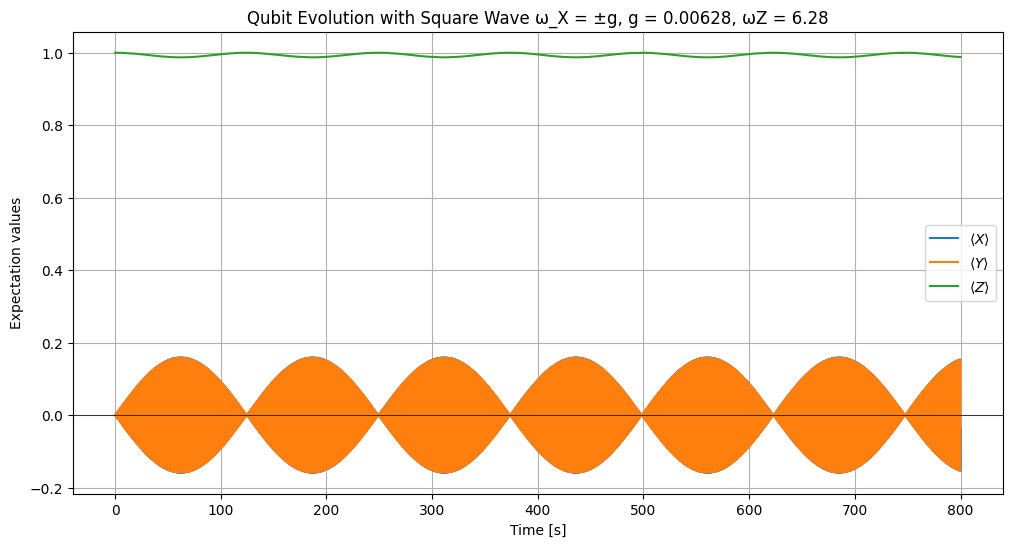

In [34]:
# Plot expectation values over time
plt.figure(figsize=(12, 6))
plt.plot(total_tlist, x_total, label=r'$\langle X \rangle$')
plt.plot(total_tlist, y_total, label=r'$\langle Y \rangle$')
plt.plot(total_tlist, z_total, label=r'$\langle Z \rangle$')
plt.axhline(0, color='k', lw=0.5)
plt.xlabel('Time [s]')
plt.ylabel('Expectation values')
plt.legend()
plt.title(f"Qubit Evolution with Square Wave ω_X = ±g, g = {g:.5f}, ωZ = {omega_Z:.2f}")
plt.grid()
plt.show()

### Exercise 28
Apply operator $\hat{U} = \exp(-i\omega_Z t \hat{Z}/2)$ to your solution of the previous exercise and plot the values of $\langle X \rangle$, $\langle Y \rangle$, $\langle Z \rangle$. Are the plots a bit simpler now?

In [35]:
# get all states
states = []
for i in range(len(results)):
    states += results[i].states

In [36]:
def apply_unitary(state, time, omega_Z):
    U = (-1j * 0.5 * omega_Z * time * sz).expm() 
    return U * state  

In [37]:
x_total_new, y_total_new, z_total_new = [], [], []

for t, state in zip(total_tlist, states):    
    # Apply the unitary transformation to all states in the evolution
    state_new = apply_unitary(state, t, omega_Z)

    # Extract the expectation values
    x_total_new.append(qutip.expect(sx, state_new))
    y_total_new.append(qutip.expect(sy, state_new))
    z_total_new.append(qutip.expect(sz, state_new))

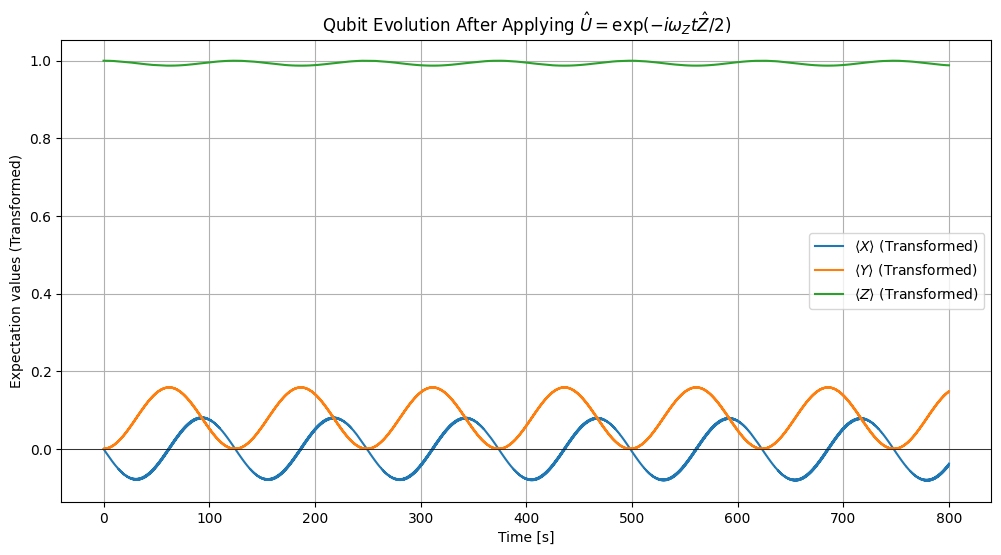

In [38]:
# Plot the transformed expectation values over time
plt.figure(figsize=(12, 6))
plt.plot(total_tlist, x_total_new, label=r'$\langle X \rangle$ (Transformed)')
plt.plot(total_tlist, y_total_new, label=r'$\langle Y \rangle$ (Transformed)')
plt.plot(total_tlist, z_total_new, label=r'$\langle Z \rangle$ (Transformed)')
plt.axhline(0, color='k', lw=0.5)
plt.xlabel('Time [s]')
plt.ylabel('Expectation values (Transformed)')
plt.legend()
plt.title(f"Qubit Evolution After Applying $\hat U  = \exp(-i\omega_Z t \hat Z /2)$")
plt.grid()
plt.show()

Yes the plots are much simpler. The transformation effectively shifts the reference frame to remove the Z-axis rotation, leading to simplified dynamics. The oscillations in $\langle X \rangle$, $\langle Y \rangle$, and $\langle Z \rangle$ become simpler and more regular after applying the unitary transformation.